# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('tsa_claims_ujian.csv')

In [3]:
data.head(5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
data.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
data.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
#BikinNamaColumn
col = ['dataFeatures','dataType','null','nullPct','unique','uniqueSample']

#Bikin Isi Column
all_cont = []
for i in range(len(data.columns)):
    content = []
    content.append(data.columns[i])
    content.append(data[data.columns[i]].dtypes)
    content.append(data[data.columns[i]].isna().sum())
    content.append(round((data[data.columns[i]].isna().sum()/len(data[data.columns[i]])*100),2))
    content.append(data[data.columns[i]].nunique())
    content.append(data[data.columns[i]].drop_duplicates().sample(2).values)
    all_cont.append(content)
    i+=1

#Bikin Index
ind =list(range(0,len(data.columns)))

#BikinDataFrameBaru
df = pd.DataFrame(all_cont,ind,col)
df

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2008090249291, 2007112035227]"
1,Date Received,object,70,0.14,3522,"[6-Jun-04, 9-Jan-12]"
2,Incident Date,object,570,1.12,10788,"[4/22/2010 5:15, 8/30/2013 0:00]"
3,Airport Code,object,2052,4.02,405,"[LYH, INL]"
4,Airport Name,object,2052,4.02,419,"[Bishop International; Flint, San Francisco In..."
5,Airline Name,object,8555,16.75,243,"[JALways Airlines, Liat Airlines]"
6,Claim Type,object,1960,3.84,8,"[Employee Loss (MPCECA), Complaint]"
7,Claim Site,object,190,0.37,6,"[nan, Motor Vehicle]"
8,Item,object,1012,1.98,1854,[Jewelry - Costume; Jewelry - Fine; Luggage (a...
9,Claim Amount,object,992,1.94,13248,"[$704.14 , $363.29 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [8]:
data.replace('-',np.nan,inplace=True)

In [9]:
## CHECK IF REPLACE SUCCESSFULL ##
data.tail(3)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51063,2015120727336,16-Nov-15,14-Sep-15,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN


Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [10]:
# SHOWING ERROR TIMEDATE #
def check_errordate(cols):
    try:
        pd.to_datetime(cols)
    except:
        return 'Error'    
data['Error Check Inc Date'] = data['Incident Date'].apply(check_errordate)

In [11]:
# data['Error Check Inc Date'].unique()
# --- SHOWING DATAFRAME CONTAIN ALL ERROR DATE ----
data[data['Error Check Inc Date']=='Error']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Error Check Inc Date
13729,2005021676300,24-Jan-05,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full,Error
14323,2005031778682,23-Feb-05,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny,Error
14856,2005033180821,23-Mar-05,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full,Error
14976,2005040181143,29-Mar-05,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN,Error
14995,2005040581540,30-Mar-05,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full,Error
15278,2005041282328,12-Apr-05,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny,Error
15934,2005051985030,17-May-05,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN,Error
16813,2005071188622,8-Jul-05,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny,Error
17198,2005091492472,1-Aug-05,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny,Error
19151,2005121397614,8-Dec-05,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full,Error


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [12]:
Error_Date= data[data['Error Check Inc Date']=='Error']
Error_Date['Incident Date'].unique()

array(['17-MAY-0200 00:00', '17-FEB-0205 00:00', '07-MAR-0005 00:00',
       '04-MAR-0205 00:00', '18-MAR-0200 00:00', '12-MAR-0205 00:00',
       '01-MAY-0205 00:00', '01-JUL-0200 00:00', '20-NOV-0205 00:00',
       '26-MAY-0200 00:00', '25-OCT-0200 00:00', '27-SEP-0206 00:00',
       '03-NOV-0206 00:00', '12-AUG-0201 00:00', '19-DEC-0206 00:00',
       '13-JAN-0207 00:00', '18-FEB-0207 00:00', '07-APR-0200 00:00',
       '29-JAN-0200 00:00', '06-MAR-0207 00:00', '20-MAY-0207 00:00',
       '13-JUL-0207 00:00', '09-JUL-0200 00:00', '02-MAR-0208 00:00',
       '17-SEP-0007 00:00', '22-MAY-0200 00:00', '28-SEP-0207 00:00',
       '04-SEP-0207 00:00', '30-NOV-0002 00:00', '08-FEB-0208 00:00',
       '29-JAN-0208 00:00', '30-JUL-0208 00:00', '13-JUL-0200 00:00',
       '23-JUL-0208 00:00', '18-JAN-0200 00:00'], dtype=object)

In [13]:
data['Date Received'].isna().sum()

70

In [14]:
def getyear(cols):
    if pd.isna(cols):
        return cols
    else:
        return '20'+ cols[-2] + cols[-1]
year_received = data['Date Received'].apply(getyear)
data['YR'] = year_received

In [15]:
data['Incident Date'] = data['Incident Date'].apply(lambda x: str(x))

In [16]:
coba = []
for i in range(len(data)):
    if data['Error Check Inc Date'][i] == 'Error':
#         print (data['Incident Date'][i])
        x = data['Incident Date'][i].split(' ')
        y = x[0].split('-')
        z = list([y[0],y[1],data['YR'][i]])
        coba.append('-'.join(z))
    else:
#     else data['Error Check Inc Date'][i] == 'None':
        v = data['Incident Date'][i]
        coba.append(v)
    i += 1

In [17]:
data['Incident Date'] = coba

In [18]:
# ConvertingDate #
data['Date Received'] = pd.to_datetime(data['Date Received'])
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number            51066 non-null object
Date Received           50996 non-null datetime64[ns]
Incident Date           50496 non-null datetime64[ns]
Airport Code            48915 non-null object
Airport Name            48915 non-null object
Airline Name            41470 non-null object
Claim Type              49035 non-null object
Claim Site              50817 non-null object
Item                    48918 non-null object
Claim Amount            46886 non-null object
Status                  47877 non-null object
Close Amount            33786 non-null object
Disposition             32846 non-null object
Error Check Inc Date    36 non-null object
YR                      50996 non-null object
dtypes: datetime64[ns](2), object(13)
memory usage: 5.8+ MB


In [20]:
data = data.drop(columns=['YR','Error Check Inc Date'])
data.head(3)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [21]:
delta_day = []
for i,j in zip(data['Date Received'],data['Incident Date']):
    delta_day.append(i-j)
data['Day Differences']=pd.Series(delta_day)
data['Day Differences']=data['Day Differences'].apply(lambda x: x.days)
data.head(3)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4.0
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0


Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

In [22]:
import seaborn as sns

Text(0.5, 1.0, 'Day Differences Distribution')

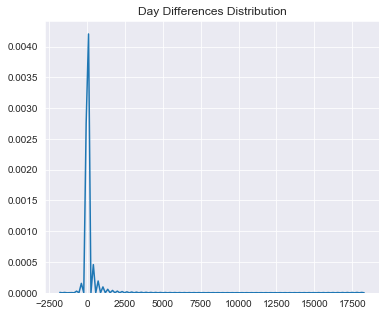

In [23]:
data_dd = pd.DataFrame(data['Day Differences'].dropna())
plt.figure(figsize=(6,5))
sns.set_style("darkgrid")
sns.distplot(data_dd,hist=None)
plt.title('Day Differences Distribution')

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

C:\Users\Idame\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Idame\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Day Differences Distribution Less than 0')

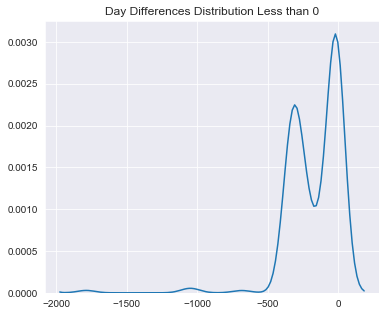

In [24]:
 ## LESS THAN 0 ##
plt.figure(figsize=(6,5))
sns.set_style("darkgrid")
sns.distplot(data_dd[data_dd < 0],hist=None)
plt.title('Day Differences Distribution Less than 0')

Text(0.5, 1.0, 'Day Differences Distribution Over than 1000')

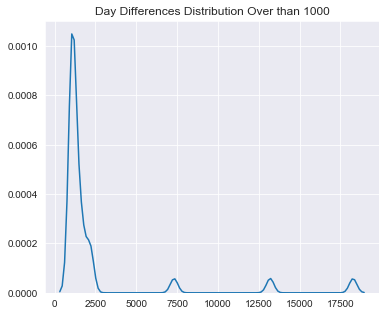

In [25]:
 ## OVER THAN 1000 ##
plt.figure(figsize=(6,5))
sns.set_style("darkgrid")
sns.distplot(data_dd[data_dd > 1000],hist=None)
plt.title('Day Differences Distribution Over than 1000')

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [26]:
delta1000 = data[data['Day Differences']>1000]
delta0 = data[data['Day Differences']<0]

- I assume, people will file a claim first before the incident, if their belongings are valuable items, in case TSA is not careful or made mistake while scanning. Yet for over than 1,000 days gap, I would assume that the belongings are less valuable. (we should check the data though! -and clean them again)

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [27]:
def clean_claim(cols):
    if pd.isna(cols):
        return cols
    else:
        x = cols[1:]
        x = x.replace(';','')
        return float(x)

data['Claim Amount'] = data['Claim Amount'].apply(clean_claim)
data['Claim Amount']

0          50.00
1        2270.09
2         200.00
3          21.44
4        1832.22
          ...   
51061        NaN
51062        NaN
51063        NaN
51064        NaN
51065        NaN
Name: Claim Amount, Length: 51066, dtype: float64

In [28]:
data['Close Amount'] = data['Close Amount'].apply(clean_claim)

In [29]:
data['Close Amount']

0        50.0
1         NaN
2         0.0
3        21.0
4         0.0
         ... 
51061     NaN
51062     NaN
51063     NaN
51064     NaN
51065     NaN
Name: Close Amount, Length: 51066, dtype: float64

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [30]:
adif = []
for i,j in zip(data['Claim Amount'],data['Close Amount']):
    adif.append(i-j)
data['Amount Differences']=pd.Series(adif)
data.head(3)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.0
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.0


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

In [31]:
data_ad = pd.DataFrame(data['Amount Differences'].dropna())

Text(0.5, 1.0, 'Amount Differences Distribution')

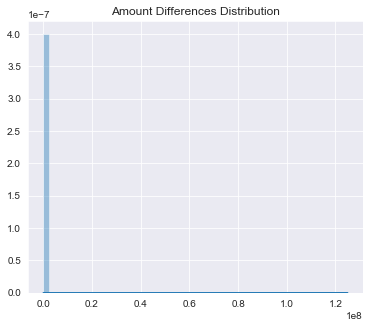

In [32]:
 ## AMOUNT DIFFERENCE ##
plt.figure(figsize=(6,5))
sns.set_style("darkgrid")
sns.distplot(data_ad,bins=None,hist=True)
plt.title('Amount Differences Distribution')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [33]:
np.sort(data_ad)
Q1,Q3=np.percentile(data_ad,[25,75])
IQR = Q3-Q1
lower = Q1-(1.5*IQR)
upper = Q3+(1.5*IQR)

In [34]:
print(lower)
print(upper)

-510.0
850.0


In [35]:
data_filter = data.copy()
data_filter = data[(data['Amount Differences']<=lower) | (data['Amount Differences']>=upper)]
data_filter.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00


In [36]:
data_filter['Claim Amount'].describe()

count    4.130000e+03
mean     4.137922e+04
std      1.947957e+06
min      8.500000e+02
25%      1.200000e+03
50%      1.802645e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [37]:
data_filter['Close Amount'].describe()

count     4130.000000
mean       113.997528
std        684.345974
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

In [38]:
n_data1 = len(data[data['Claim Amount']>data['Close Amount']])
n_data2 = len(data[data['Claim Amount']<data['Close Amount']])

In [39]:
print(f"""Jumlah data Claim Amount > Close Amount: {n_data1}
\nJumlah data Claim Amount < Close Amount : {n_data2}""")

Jumlah data Claim Amount > Close Amount: 24684

Jumlah data Claim Amount < Close Amount : 111


Berdasar data di atas, jumlah data Claim Bigger Money lebih banyak. Maka asumsi sebelumnya dapat dinyatakan benar.

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

#### Relationship Between Airport or Airline with Number of Claim and Claim Type

In [40]:
data['Airline Name'].value_counts()[:10]

American Airlines       4377
Delta Air Lines         4371
UAL                     3507
Southwest Airlines      3258
Continental Airlines    2363
USAir                   2359
Northwest Airlines      2311
Delta Air Lines         2074
Southwest Airlines      1899
Jet Blue                1780
Name: Airline Name, dtype: int64

In [41]:
data['Airport Code'].value_counts()[:10]

LAX    2379
JFK    2286
EWR    1747
ORD    1712
MCO    1633
MIA    1613
ATL    1525
SEA    1330
LAS    1278
PHX    1267
Name: Airport Code, dtype: int64

Pertama, saya ingin melihat corr antara Airline Name dan Airport Code. Melihat kedua tipe data adalah Kategorikal, maka untuk melihat korelasinya, saya menggunakan methode Chi-Square dan Crammers V.

In [42]:
from scipy.stats import chisquare
from scipy import stats

import researchpy as rp
table, results = rp.crosstab(data['Airline Name'], data['Airport Code'], prop= 'col', test= 'chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 94713.0) =,340842.1849
1,p-value =,0.0000
2,Cramer's V =,0.1859


Dengan menggunakan chi-square, bisa dilihat apakah ada korelasi yang signifikan antara 2 fitur. Hasil menunjukkan pval < dari alpha val (0.05), sehingga dengan confidence level 95% saya berasumsi bahwa ada hubungan antara 2 fitur tersebut(reject H0).

Berdasarkan analisis Cramer's V, antara Airline Name dan Airport Code memiliki value 0,18 sehingga bisa dikatakan Airline Name memiliki efek korelasi yang kecil (small significance to none) terhadap Airport Code. (with range 0 to 1, 0 zero effect, 1 large effect)

Next, saya ingin melihat corr antara Airline Name dan Airport Code jika dibandingkan dengan Claim Type, masih menggunakan metode yang sama.

In [43]:
data['Claim Type'].value_counts()

Passenger Property Loss    29713
Property Damage            18590
Personal Injury              394
Passenger Theft              115
Employee Loss (MPCECA)       114
Motor Vehicle                 96
Complaint                     13
Name: Claim Type, dtype: int64

In [44]:
from scipy.stats import chisquare
from scipy import stats

import researchpy as rp
table, results = rp.crosstab(data['Airline Name'], data['Claim Type'], prop= 'col', test= 'chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 1434.0) =,1875.1708
1,p-value =,0.0000
2,Cramer's V =,0.0879


In [45]:
from scipy.stats import chisquare
from scipy import stats

import researchpy as rp
table, results = rp.crosstab(data['Airport Code'], data['Claim Type'], prop= 'col', test= 'chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 2412.0) =,20547.0737
1,p-value =,0.0000
2,Cramer's V =,0.2687


Dengan confidence level 95%, saya berasumsi ada hubungan (Reject H0) antara Airport Code dan Airline Name dengan Claim Type (pVal < alpha value 0,05).

Berdasarkan analisis Cramer's V:
Airline Name dan Claim Type = 0,08
Airport Code dan Claim Type = 0,26

Bisa dikatakan, Airport Code memiliki signifikansi efek yang lebih besar terhadap Claim Type dibandingkan dengan Airline Code (with range 0 to 1, 0 zero effect, 1 large effect).

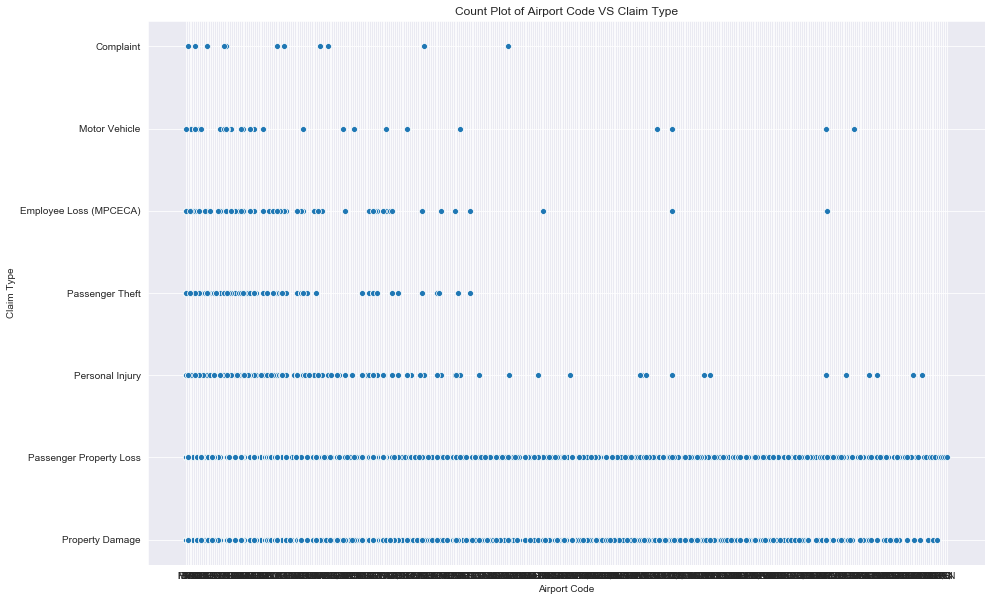

In [46]:
plt.figure(figsize=(15,10))
plt.title('Count Plot of Airport Code VS Claim Type')
sns.scatterplot(data = data, x = 'Airport Code', y = 'Claim Type')
## Need Cleaning ##

Here I try to visualize the relation of Claim Type in all Airport Code, to see what kind of Claim usually each of airport has. (But it needs more cleaning).

In [47]:
data[data['Claim Type'].isna()].head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.0,Denied,0.00,Deny,42.0,200.00
6,18202,2002-09-16,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Checkpoint,Computer - Laptop,678.0,Approved,678.00,Approve in Full,35.0,0.00
7,16961,2002-09-18,2002-08-05,NaN,NaN,Delta Air Lines,NaN,Checked Baggage,Other,175.0,Settled,171.99,Settle,44.0,3.01
8,18394,2002-09-20,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Other,150.0,Denied,0.00,Deny,39.0,150.00
11,0616760L,2002-09-26,NaT,NaN,NaN,NaN,NaN,Other,Locks,NaN,Insufficient; one of the following items requi...,NaN,NaN,NaN,NaN


In [48]:
data[data['Claim Type'].isna()]['Item'].value_counts()[:5]

Other                                         563
Luggage (all types including footlockers)     268
Clothing - Shoes; belts; accessories; etc.    257
Jewelry - Fine                                192
Cameras - Digital                             145
Name: Item, dtype: int64

In [49]:
data[data['Claim Type'].isna()]['Claim Site'].value_counts()[:5]

Checked Baggage    1203
Other               436
Checkpoint          257
Motor Vehicle         5
Name: Claim Site, dtype: int64

In [50]:
data[data['Claim Type'].isna()]['Airport Code'].value_counts()[:5]

LAX    100
EWR     71
MIA     65
ORD     60
JFK     53
Name: Airport Code, dtype: int64

In [51]:
data[data['Claim Type'].isna()]['Airline Name'].value_counts()[:5]

American Airlines     166
Delta Air Lines       161
UAL                   122
Northwest Airlines     89
USAir                  89
Name: Airline Name, dtype: int64

Based on exploratory data above, I would assume people report NaN Claim Data because they don't know the item being reported or maybe they did not stated the item, as data above stated the top frequency of the item is "Other" / not stated.
Most item reported while in checked Bagage, in LAX Airport, and from American & Delta Airlines.

#### Pattern Status and Disposition Column

Text(0.5, 1.0, 'Status Count')

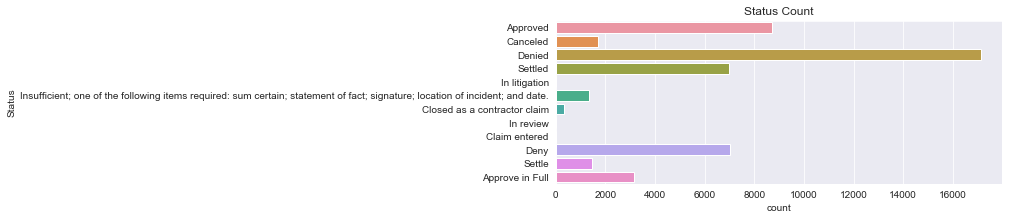

In [52]:
plt.figure(figsize=(8,3))
sns.countplot(y=data['Status'], data=data)
plt.title('Status Count')

Text(0.5, 1.0, 'Disposition Count')

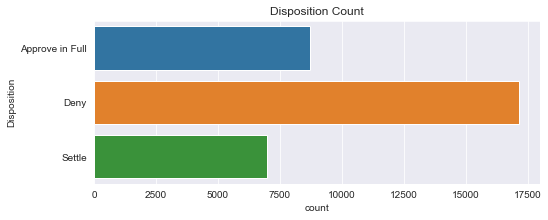

In [53]:
plt.figure(figsize=(8,3))
sns.countplot(y=data['Disposition'], data=data)
plt.title('Disposition Count')

#### PATTERN: Many claims status are DENIED

In [54]:
claim_stat_data = data[(data['Disposition']=='Deny') & (data['Status']=='Denied')]

In [55]:
n_data3 = len(claim_stat_data[claim_stat_data['Claim Amount']>claim_stat_data['Close Amount']])
n_data4 = len(claim_stat_data[claim_stat_data['Claim Amount']<claim_stat_data['Close Amount']])

print(f"Jumlah data Claim Amo > Close Amo = {n_data3}")
print(f"Jumlah data Claim Amo < Close Amo = {n_data4}")

Jumlah data Claim Amo > Close Amo = 16496
Jumlah data Claim Amo < Close Amo = 4


Based on exploratory data, Status and Disposition are influenced by Claim Amo and Close Amo Columns. Where Claim Amo are higher or when people claimed bigger money, the higher the chance for the claim to be denied by TSA. I assume this conclusion based on data size difference as stated above.

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

In [56]:
data['Airline Name'].value_counts()[:10]

American Airlines       4377
Delta Air Lines         4371
UAL                     3507
Southwest Airlines      3258
Continental Airlines    2363
USAir                   2359
Northwest Airlines      2311
Delta Air Lines         2074
Southwest Airlines      1899
Jet Blue                1780
Name: Airline Name, dtype: int64

We could see from above, the top 10 of Airline whose passenger filed Claim to TSA or where TSA made most mistakes.

In [57]:
data['Airport Code'].value_counts()[:10]

LAX    2379
JFK    2286
EWR    1747
ORD    1712
MCO    1633
MIA    1613
ATL    1525
SEA    1330
LAS    1278
PHX    1267
Name: Airport Code, dtype: int64

We could see from above, the top 10 of Airport whose passenger filed Claim to TSA or where TSA made most mistakes.

In [70]:
data['Item'].value_counts()[:10]

Other                                         9183
Luggage (all types including footlockers)     4818
Clothing - Shoes; belts; accessories; etc.    3761
Jewelry - Fine                                2488
Locks                                         2408
Cameras - Digital                             2280
Computer - Laptop                             2146
Baggage/Cases/Purses                          1513
Computer & Accessories                        1276
Clothing                                      1161
Name: Item, dtype: int64

We could see, the top two where TSA made most mistakes or when people made complains are in US (Airport LAX and JFK) also US Airlines (American Airlines and Delta Airlines). Most of it items not stated.

### DASHPLOT

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [58]:
np.random.seed(101)

In [59]:
data_normal = data[(data['Amount Differences']>=lower) | (data['Amount Differences']<=upper)]

In [60]:
data_normal.dropna()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,-333.0,0.00
3,16759,2002-08-21,2002-07-12 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.00,Approve in Full,40.0,0.44
14,18908,2002-10-09,2002-09-09 00:00:00,RDU,Raleigh-Durham International,Continental Airlines,Property Damage,Checkpoint,Other,342.36,Approved,237.00,Approve in Full,30.0,105.36
17,21052,2002-10-17,2002-09-22 00:00:00,MCO,Orlando International Airport,Virgin Atlantic,Property Damage,Checkpoint,Eyeglasses - (including contact lenses),60.00,Approved,60.00,Approve in Full,25.0,0.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36243,2010010667221,2009-12-30,2009-12-01 16:40:00,AUS,Austin-Bergstrom International Airport,Alaska Airlines,Property Damage,Checked Baggage,Medical Equipment & Insturments,80.00,Settled,72.00,Settle,28.0,8.00
36244,2010010867347,2009-12-30,2009-11-02 00:00:00,ORD,Chicago O'Hare International Airport,UAL,Passenger Property Loss,Checked Baggage,DVD/CD Players; Handbags & Purses (leather or ...,546.95,Settled,514.73,Settle,58.0,32.22
36245,2010010867360,2009-12-30,2009-12-14 08:30:00,SJU,Luis Munoz Marin International,American Airlines,Property Damage,Checked Baggage,Alcoholic beverages; Cosmetics - Perfume; toil...,185.00,Settled,179.23,Settle,15.0,5.77
36246,2010010667197,2009-12-31,2009-12-10 12:40:00,DEN,Denver International Airport,UAL,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,70.00,Approved,70.00,Approve in Full,20.0,0.00


In [61]:
data_normal.isna().sum()

Claim Number             0
Date Received           33
Incident Date           90
Airport Code           922
Airport Name           922
Airline Name          7073
Claim Type            1343
Claim Site              74
Item                   811
Claim Amount             0
Status                   0
Close Amount             0
Disposition           1201
Day Differences        123
Amount Differences       0
dtype: int64

In [62]:
data_normal.to_csv('tsa_claims_dashboard_ujian.csv',index=False)

In [63]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# import plotly.graph_objs as go
# import pandas as pd
# import seaborn as sns
# import dash_table

# def generate_table(dataframe, page_size=10):
#     return dash_table.DataTable(
#         id='dataTable',
#         columns=[{
#             "name": i,
#             "id": i
#         } for i in dataframe.columns],
#         data=dataframe.to_dict('records'),
#         page_action="native",
#         page_current=0,
#         page_size=page_size,
#     )

# tips = pd.read_csv('tsa_claims_dashboard_ujian.csv')
# external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# app.layout = html.Div(
#     children=[
#         html.H1('Dashboard Ujian Modul 2'),
#         html.Div(children='''
#         Created by: Idame Kinanti'''),
#         html.Br(),
#         html.Div(id='div-table',
#             children=[generate_table(tips)])
#     ])
    
# if __name__ == '__main__':
#     app.run_server(debug=True)

### SQL

Export the data to your SQL database, and try to connect the database to the dashboard

In [64]:
import pandas as pd
import mysql.connector
conn = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'idame123')

In [65]:
cursor = conn.cursor(dictionary = True)
cursor.execute('use TSA_claim')

In [66]:
conn.close()